In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\VEDANSHI\Downloads\breast-cancer.csv")

In [3]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


INFORMATION RELATED TO DATASET

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

STATISTICAL FACTS

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


VALUE COUNTS FOR THE TARGET COLUMN

In [5]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

CHECKING FOR NULL VALUES

In [6]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

EDA

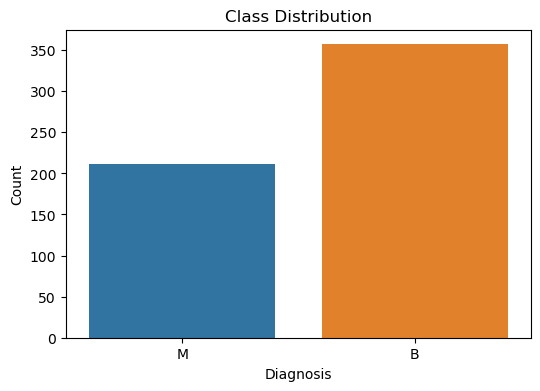

In [3]:
# 1. Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df)
plt.title('Class Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

INSIGHT:The above bar chart shows which type of tumor is more in number .Here the B(Benign tumor) has more count as compared to M(Malignant tumor)

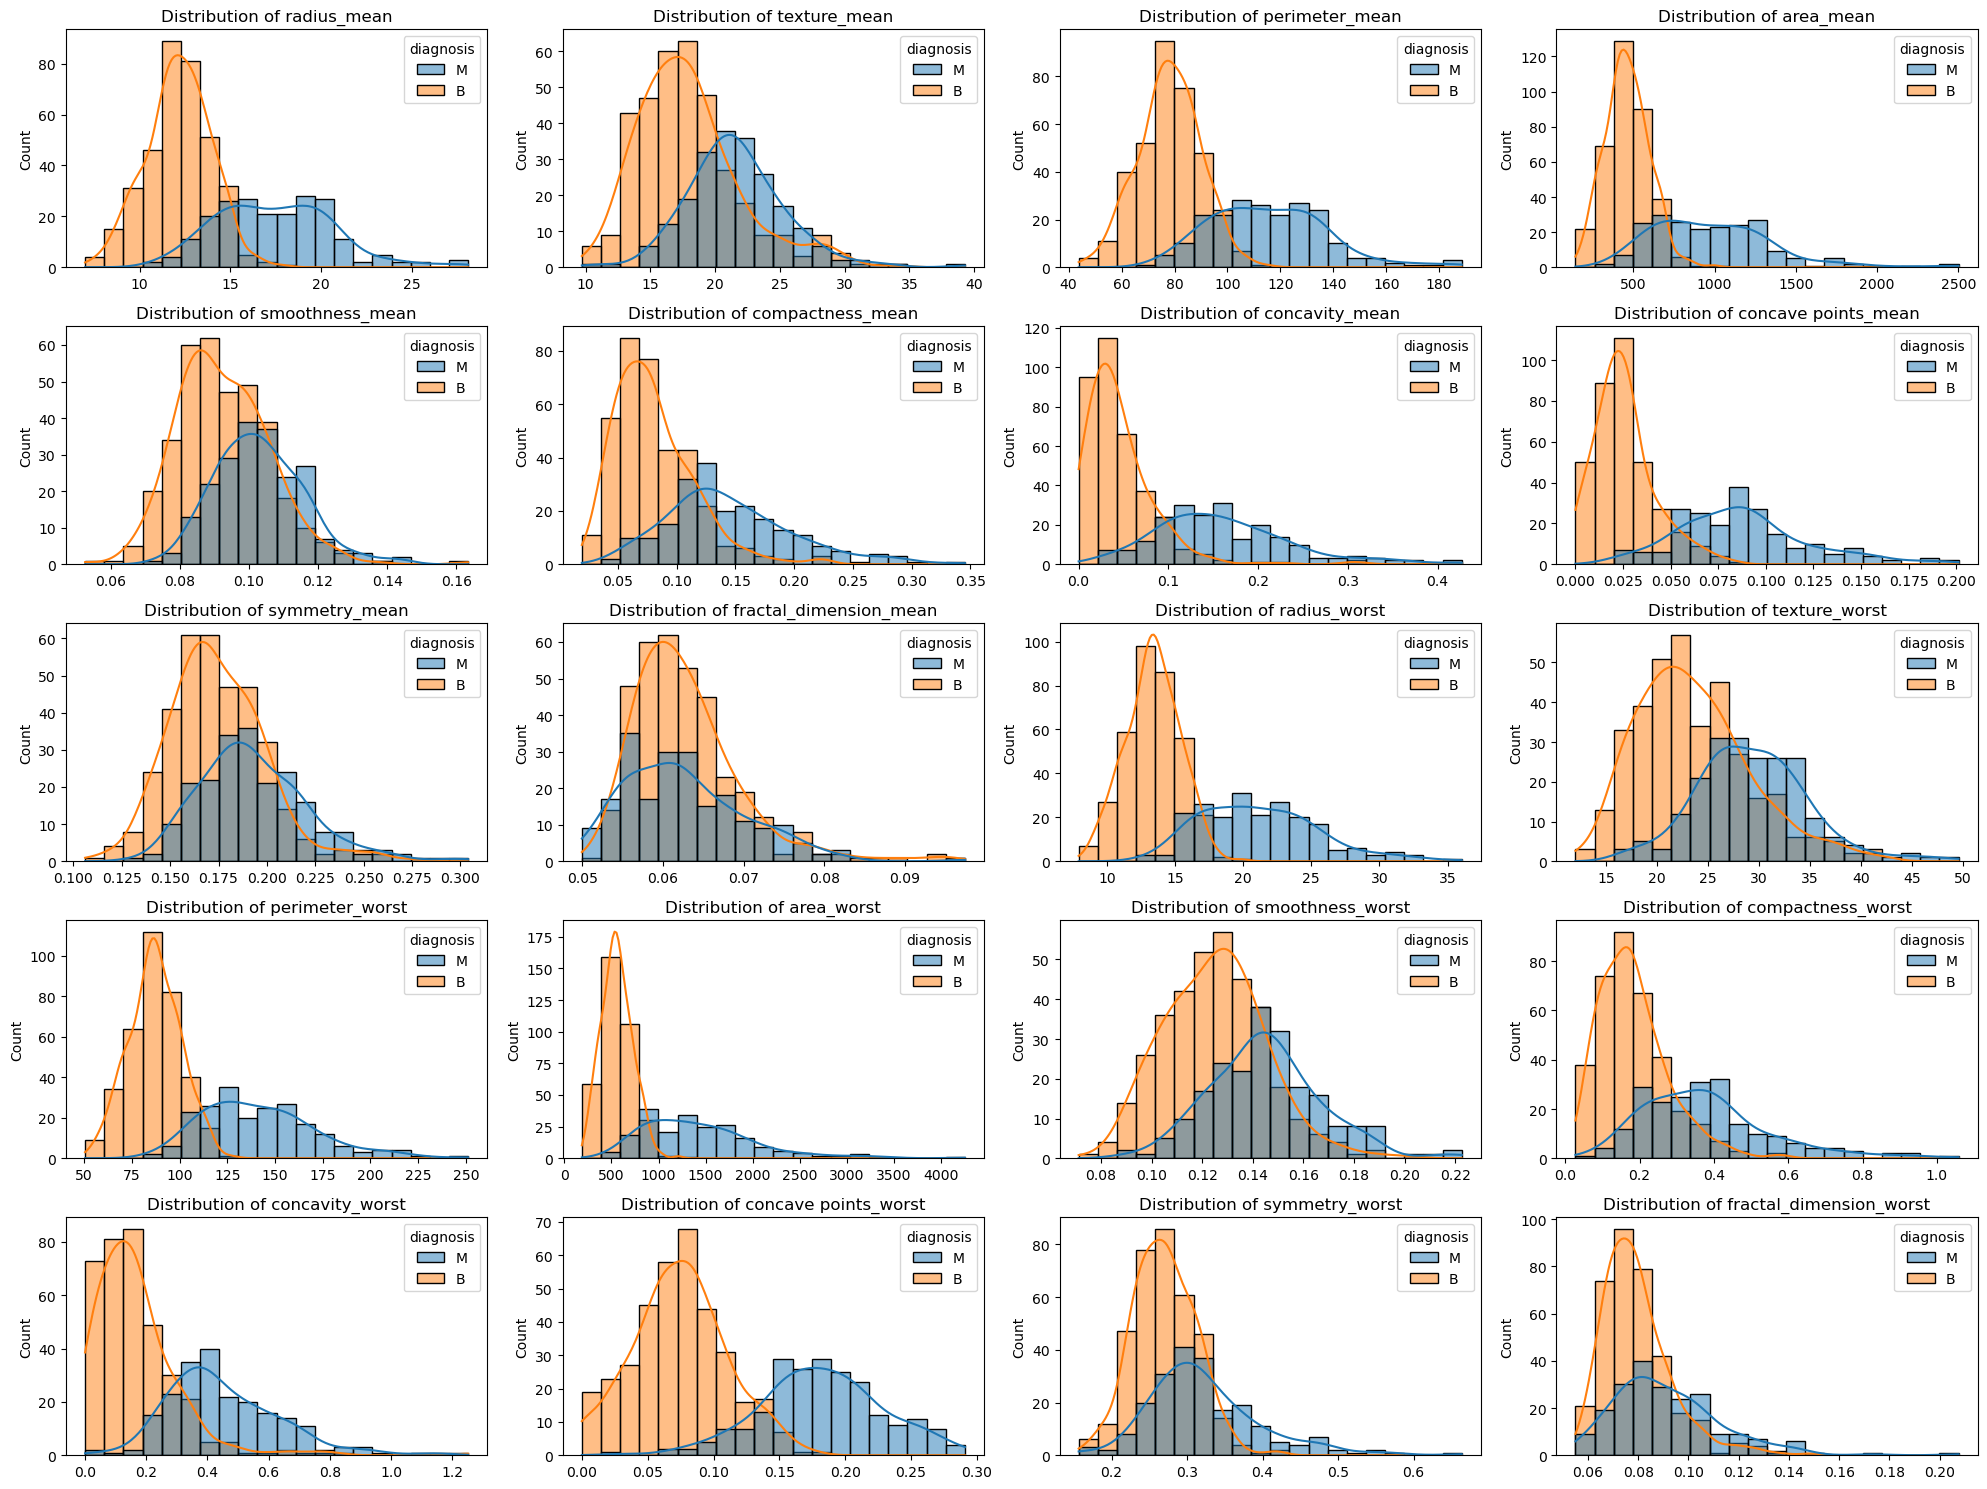

In [6]:
parameters = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
              'smoothness_mean', 'compactness_mean', 'concavity_mean', 
              'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
              'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 
              'smoothness_worst', 'compactness_worst', 'concavity_worst', 
              'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

# Plot histograms for each parameter with separate distributions for malignant and benign tumors
plt.figure(figsize=(20, 15))
for i, param in enumerate(parameters, 1):
    plt.subplot(5, 4, i)
    sns.histplot(data=df, x=param, hue='diagnosis', kde=True, bins=20)
    plt.title(f'Distribution of {param}')
    plt.xlabel('')
plt.tight_layout()
plt.show()

INSIGHT: THE ABOVE HISTOGRAMS SHOWS VARIATIONS FOR EACH TUMOR M & B .HERE LIKE IN FIRST CASE THE DISTRIBUTION FOR RADIUS_MEAN FOR B MOSTLY LIE BETWEEN 10 TO 15 WHILE M LIES BETWEEN 10 TO 25 & IT ALSO SHOWS THAT MAXIMUM NO OF TUMOR B HAS A RADIUS MEAN AROUND 12 OR 12.5. 
SIMILARLY FOR REST OF THE CASES

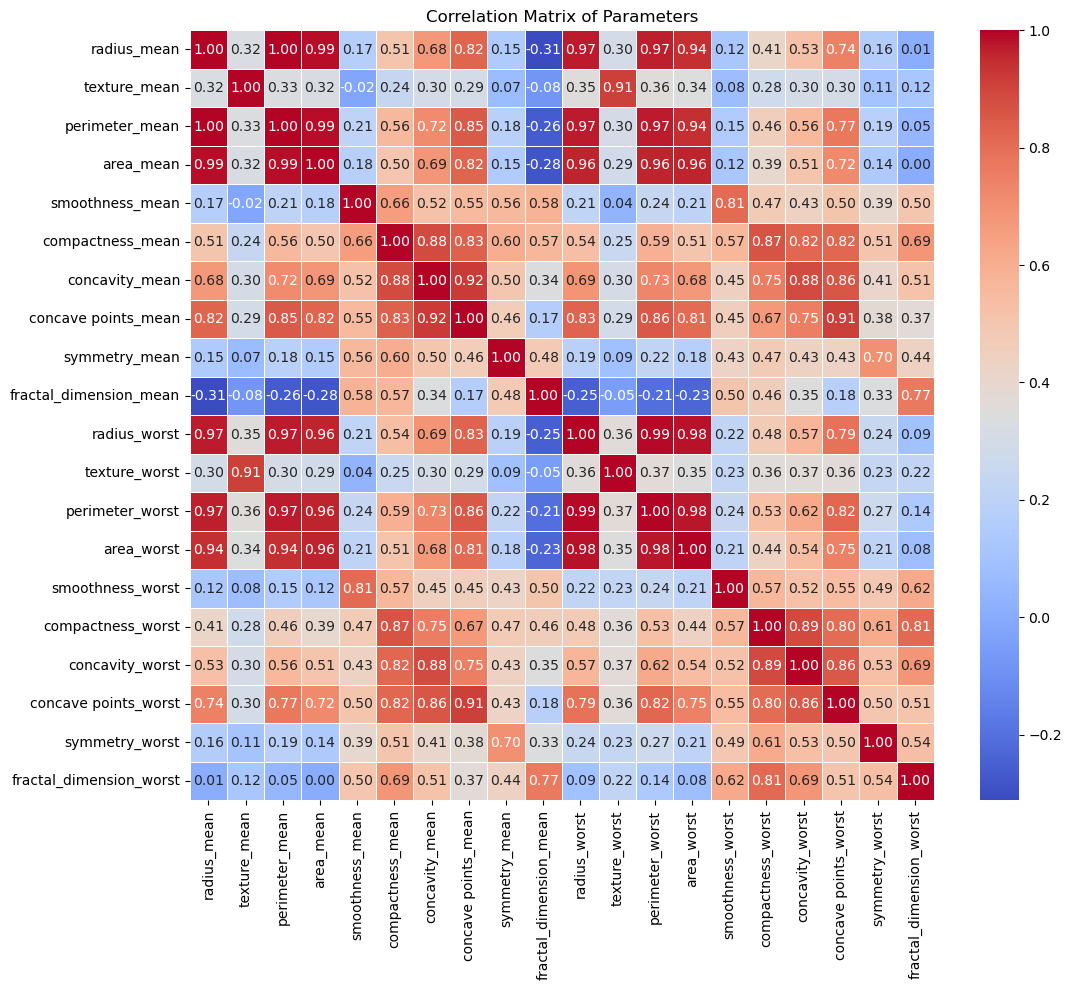

In [7]:
parameters = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
              'smoothness_mean', 'compactness_mean', 'concavity_mean', 
              'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
              'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 
              'smoothness_worst', 'compactness_worst', 'concavity_worst', 
              'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

# Compute the correlation matrix
correlation_matrix = df[parameters].corr()

# Generate a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Parameters')
plt.show()


INSIGHT: THE ABOVE HEAT MAP SHOWS CORRELATION AMONG DIFFERENT PARAMETERS THAT RESULTS IN THE TYPE OF TUMOR PRESENT.
HERE THE "RED" COLOR BOXES INDENTIFY HIGH CORRELATION THAN THE "BLUE ONES".
THE COLOR CHANGES AS FROM RED TO BLUE AS CORRELATION DECREASES IT GETS CLOSE TO BLUE.

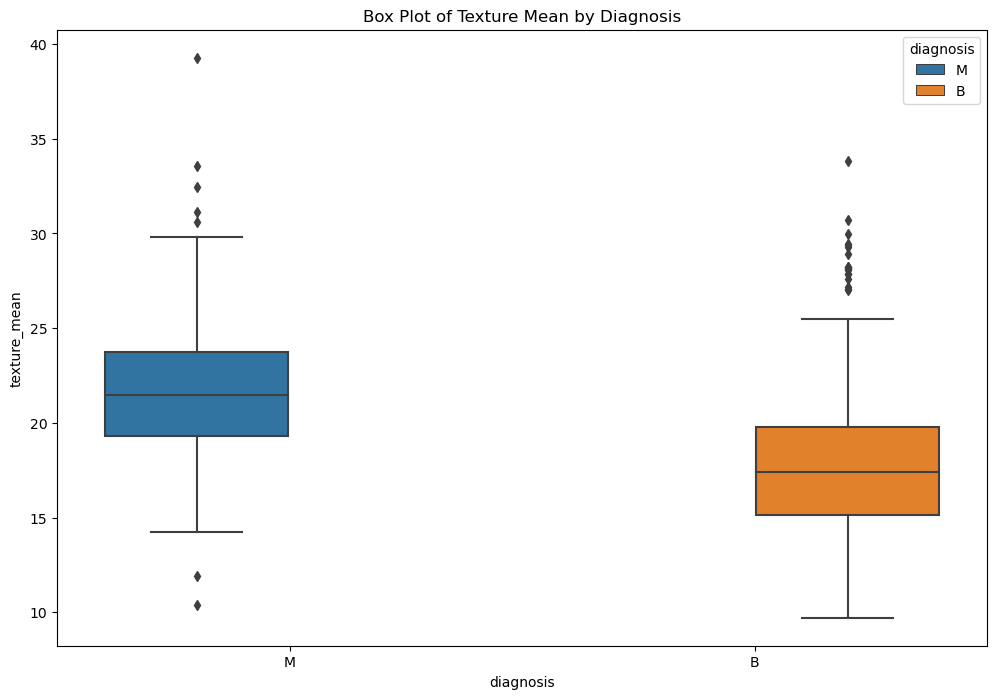

In [10]:
# Box Plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='diagnosis', y='texture_mean', hue='diagnosis')
plt.title('Box Plot of Texture Mean by Diagnosis')
plt.show()


INSIGHT: THE ABOVE BOX PLOT SHOWS HOT THE TEXTURE_MEAN IS RELATED WITH THE DIAGNOSIS(B or M) 
the outer dots indicates outliers which basically means certain values have deviatede from its mean position
Here majority lies between20 to 25 for the blue(M-malignant) plot and 15 to 20 for orange(B-benign)

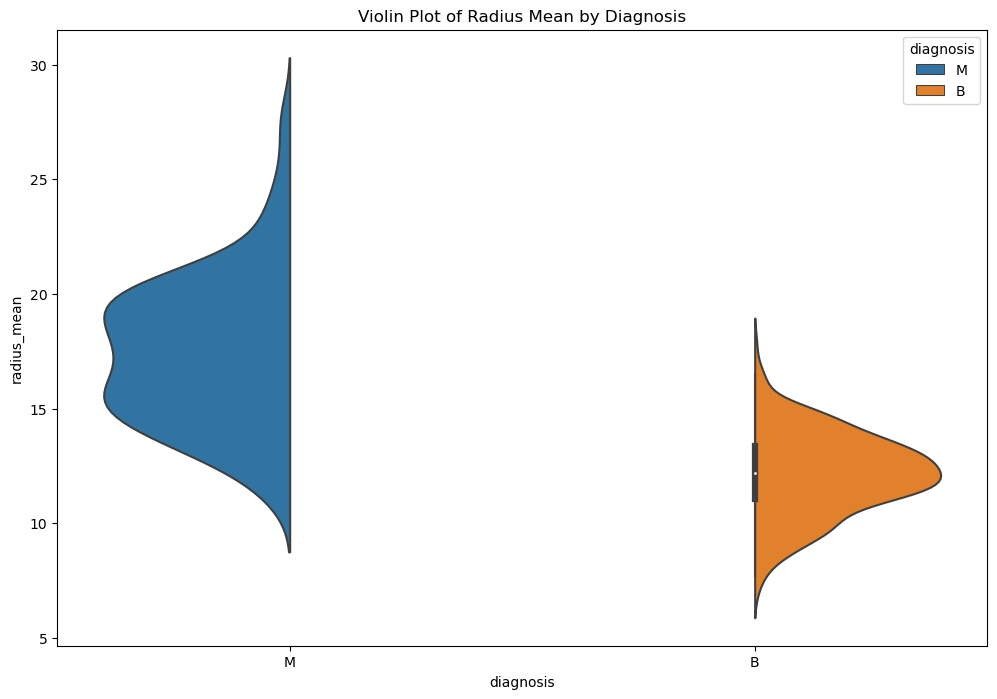

In [11]:
# Violin Plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='diagnosis', y='radius_mean', hue='diagnosis', split=True)
plt.title('Violin Plot of Radius Mean by Diagnosis')
plt.show()


THE ABOVE VIOLIN PLOT SHOWS RELATIONSHIP BETWEEN BENIGN & MALIGNANT TUMOR
HERE THE M(MALIGNANT) HAS A BROADER SPREAD INDICATING WIDE RANGE OF VALUES IN RADIUS_MEAN THAN B(BENIGN).

                                                 FEATURE IMPORTANCE

LABEL ENCODING:CONVERTING THE TEXT VALUE INTO 0 & 1 . HERE THE DIAGONSIS COLUMN AS TEXTUAL DATA AS 'M' & 'B'.
LABEL ENCODING WILL CONVERT IT TO 0 AND 1 
BELOW: M->1
       B->0
    
FEATURE SELECTION:Selecting only the most important features which have more impact on the model from the given dataset.

TYPE 1:FILTER METHOD

1)CHI SQUARE TEST:The chi-square test helps you to solve the problem in feature selection by testing the relationship between the features.A chi-square test is used in statistics to test the independence of two events. Given the data of two variables, we can get observed count O and expected count E.
BELOW ARE THE 5 MOST IMPORTANT FEATURES SELECTED THROUGH CHI SQUARE TEST:
'perimeter_mean', 'area_mean', 'area_se', 'perimeter_worst',
 'area_worst'

In [4]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder



# Encode the target variable to numerical values
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

# Separate features (X) and target variable (y)
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis']
print(y)
# Select the top k features based on chi-square test
k = 5  # You can adjust the number of features you want to select
best_features = SelectKBest(score_func=chi2, k=k)
fit = best_features.fit(X, y)

# Get the indices of the selected features
indices_selected = fit.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[indices_selected]

# Print the selected feature names
print("Selected features:")
print(selected_features)


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64
Selected features:
Index(['perimeter_mean', 'area_mean', 'area_se', 'perimeter_worst',
       'area_worst'],
      dtype='object')


TYPE 2 :WRAPPER METHOD
1)RECURSIVE FEATURE ELIMINATION: or RFE, which is similar in spirit to backward selection. It also starts with a full model and iteratively eliminates the features one by one. The difference is in the way the features to discard are chosen. Instead of relying on a model performance metric from a hold-out set, RFE makes its decision based on feature importance extracted from the model.
BELOW ARE IMPORTANT FEATURES BASED ON RFE:
'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
'concavity_worst', 'concave points_worst'

In [33]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Separate the data into features (X) and target (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Initialize a RandomForestClassifier (you can use any estimator)
estimator = RandomForestClassifier(random_state=42)

# Initialize RFE with the estimator and desired number of features to select
num_features_to_select = 10  # Adjust as needed
rfe = RFE(estimator, n_features_to_select=num_features_to_select)

# Fit RFE to the data
rfe.fit(X, y)

# Get the ranking of features
feature_ranking = rfe.ranking_

# Get the selected features
selected_features = X.columns[rfe.support_]

print("Selected Features:")
print(selected_features)


Selected Features:
Index(['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')


                                                  CORRELATION MATRIX

PEARSON'S CORRELATION MATRIX:
the Pearson correlation coefficient (PCC) is a correlation coefficient that measures linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations.
BELOW MATRIX SHOWS THE MAX AND MIN CORRELATION BETWEEN THE VARIABLES:
MAX:
radius_mean and perimeter_mean with correlation: 0.9978552814938109
MIN:
fractal_dimension_mean and radius_mean with correlation: -0.3116308263092899

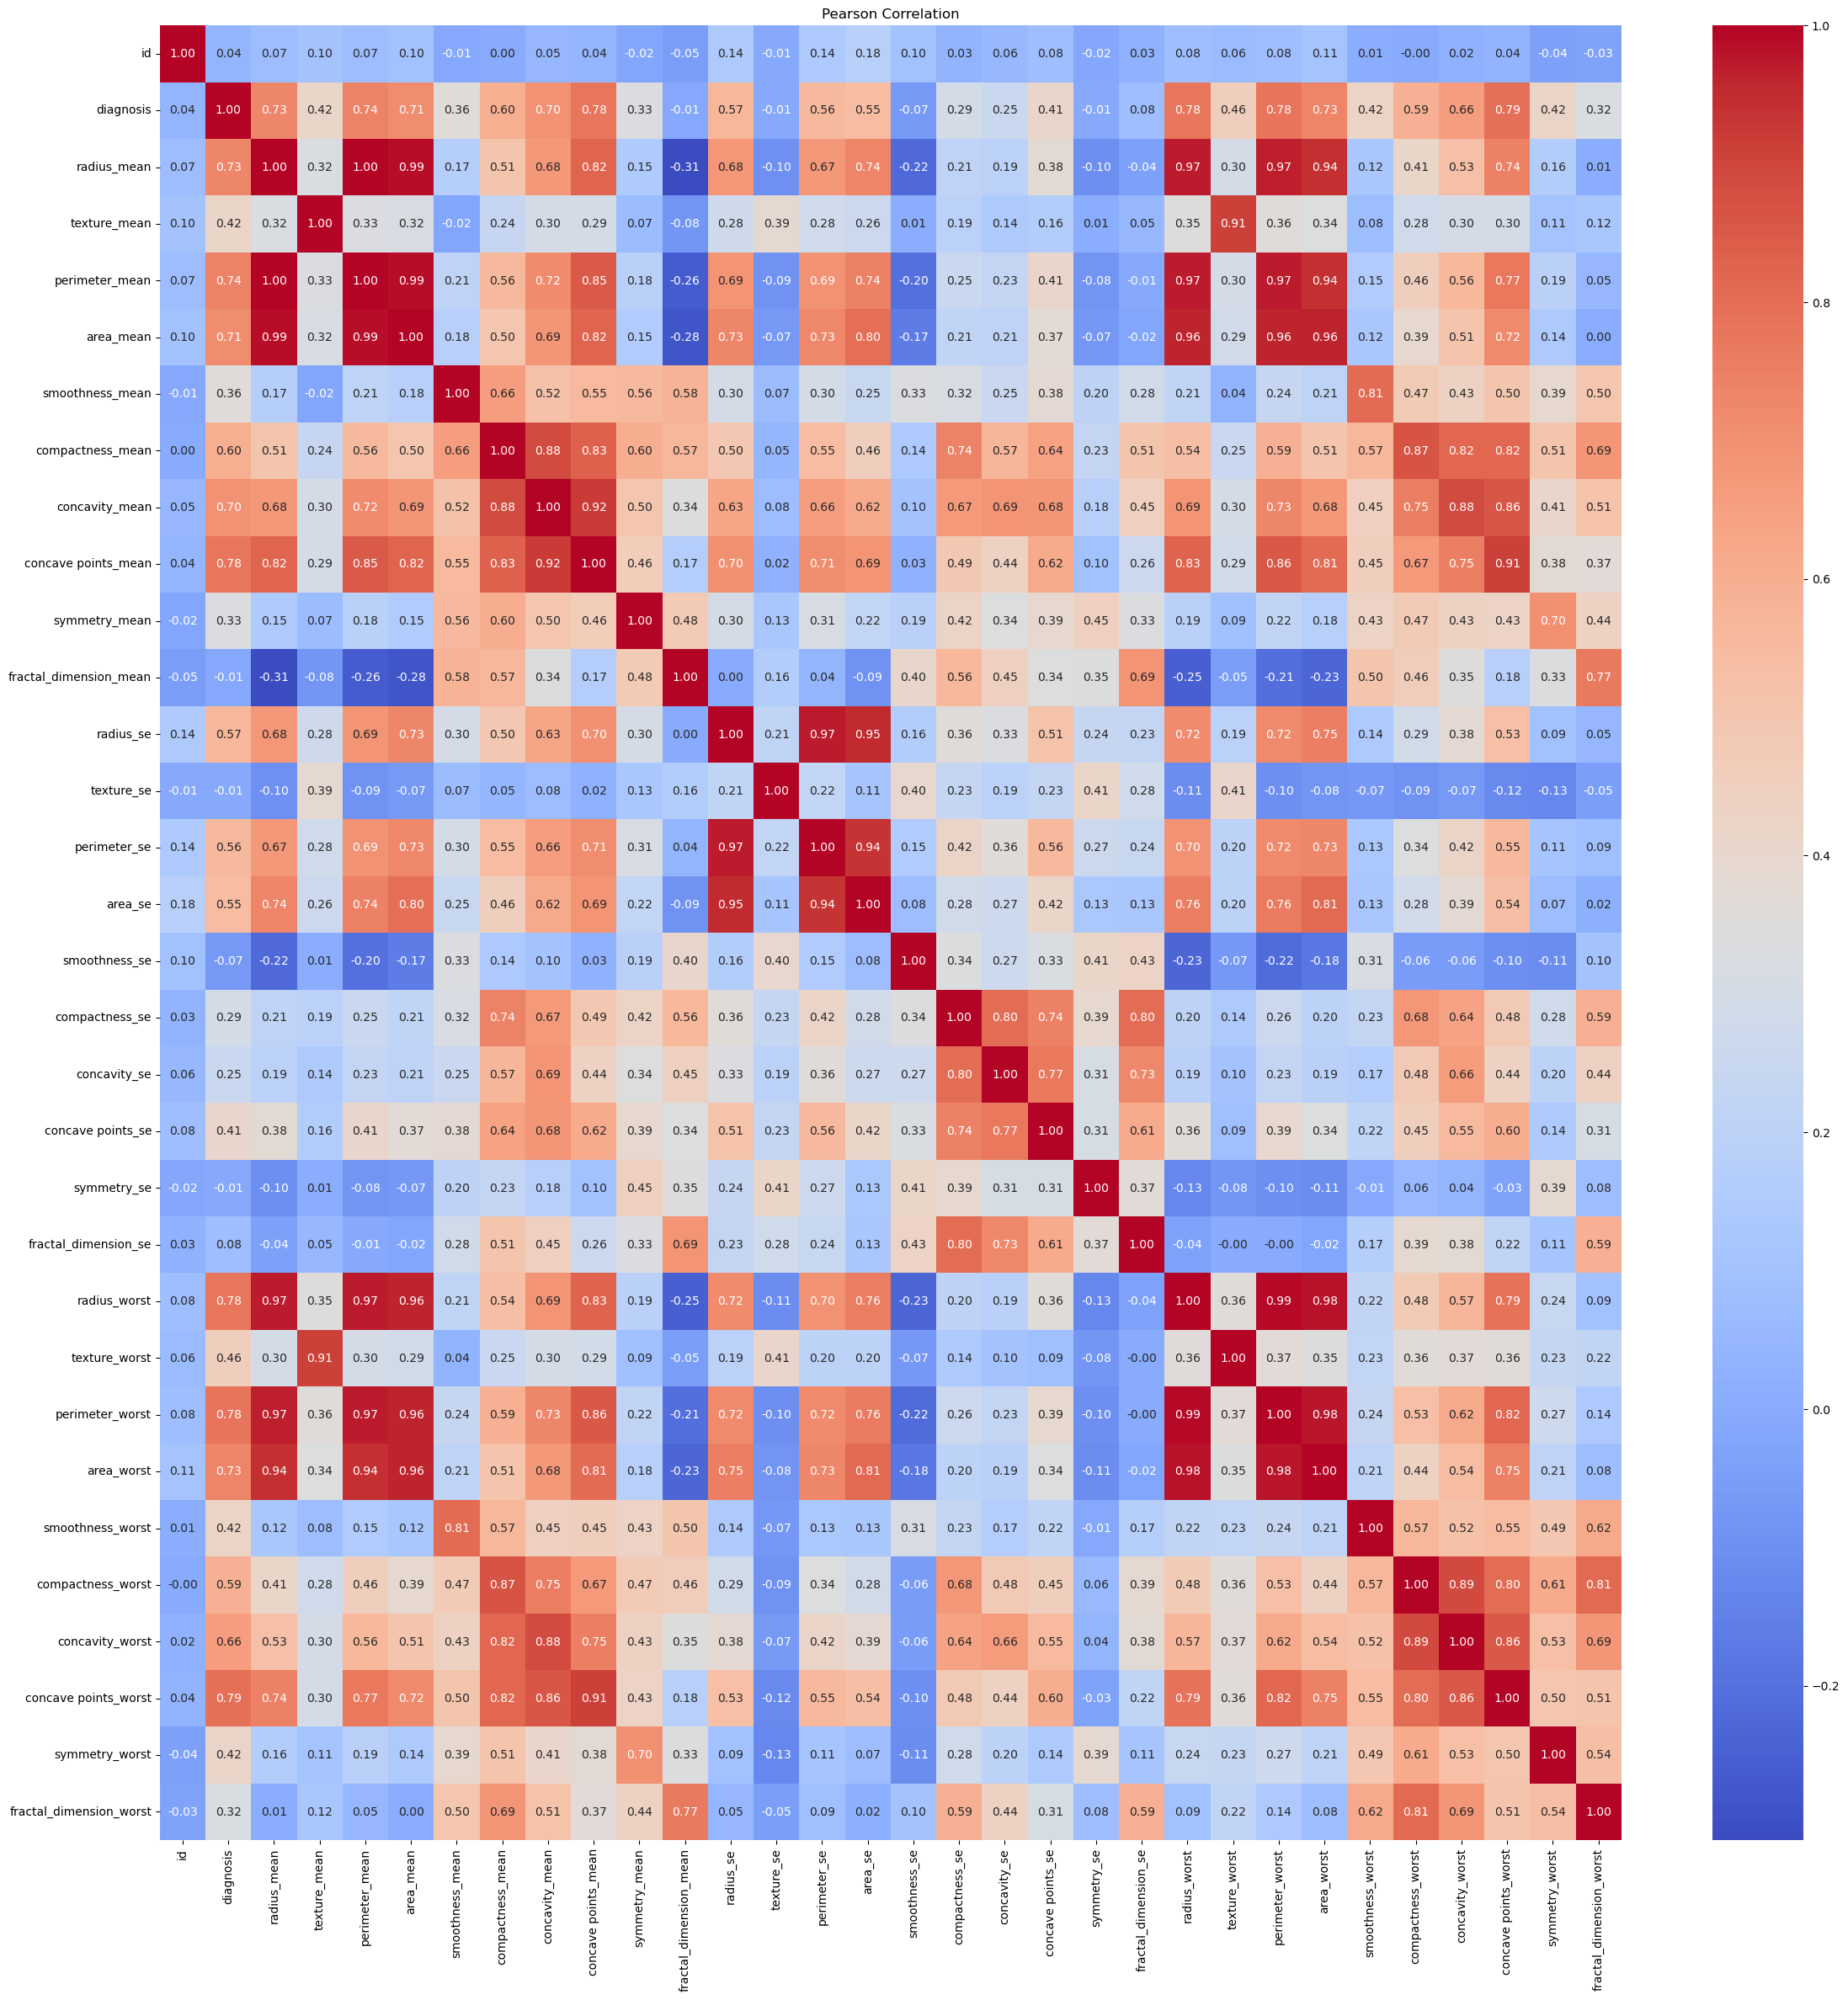

Variables with Maximum Correlation:
radius_mean and perimeter_mean with correlation: 0.9978552814938109

Variables with Minimum Correlation:
fractal_dimension_mean and radius_mean with correlation: -0.3116308263092899


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already calculated the pearson_corr DataFrame
pearson_corr = df.corr(method='pearson')
# Plot the heatmap
plt.figure(figsize=(28,28))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation')
plt.show()

# Find the variable pairs with maximum and minimum correlation
max_corr = pearson_corr.unstack().sort_values(ascending=False)[pearson_corr.shape[0]:pearson_corr.shape[0]+1]
min_corr = pearson_corr.unstack().sort_values()[0:1]

# Extract variable names from the index
max_corr_vars = max_corr.index.tolist()[0]
min_corr_vars = min_corr.index.tolist()[0]

# Print the results
print("Variables with Maximum Correlation:")
print(max_corr_vars[0], "and", max_corr_vars[1], "with correlation:", max_corr.values[0])
print("\nVariables with Minimum Correlation:")
print(min_corr_vars[0], "and", min_corr_vars[1], "with correlation:", min_corr.values[0])


                          DETECTING OUTLIERS USING BOX PLOT(IQR-INTER QUARTILE RANGE )

OUTLIERS: are the points which deviate significantly from its mean position.
Using IQR we can calculate  how many data points are away from its mean position as outliers can cause problem while initializing a ML model.
NO OF OUTLIERS IN DATASET:171
BELOW ARE THE INDICES FOR EACH ROW WHICH HAS OUTLIER.

In [17]:
import numpy as np

# Calculate IQR for each feature
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers (e.g., 1.5 times the IQR)
threshold = 1.5

# Find outliers for each feature
outliers = ((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any(axis=1)

# Print the number of outliers
print("Number of outliers:", outliers.sum())

# Print the indices of outliers
print("Indices of outliers:", np.where(outliers)[0])


Number of outliers: 171
Indices of outliers: [  0   1   2   3   4   5   8   9  12  14  15  18  22  23  24  25  26  27
  30  31  33  34  35  38  41  42  53  56  60  62  63  68  70  71  72  76
  77  78  82  83  95 105 108 110 111 112 116 118 119 121 122 136 138 145
 146 147 150 151 152 156 161 162 164 168 173 176 180 181 185 190 192 196
 199 202 203 210 212 213 214 218 219 229 232 236 239 242 245 250 252 254
 256 257 258 259 262 265 272 273 275 288 290 300 302 314 318 323 329 332
 335 337 339 343 345 351 352 366 368 369 370 372 373 376 379 388 389 391
 393 400 416 417 424 430 433 443 449 450 455 460 461 465 468 469 471 473
 485 489 492 498 503 504 505 507 520 521 528 533 535 537 538 539 553 556
 557 559 561 562 563 564 565 567 568]


C:\Users\VEDANSHI\AppData\Local\Temp\ipykernel_21896\2963110618.py:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any(axis=1)


                                                   CLASS IMBALANCE

In [19]:
# Count the number of occurrences of each class
class_counts = df['diagnosis'].value_counts()

# Calculate the proportion of each class
class_proportions = class_counts / class_counts.sum()

# Print class distribution
print("Class Distribution:")
print(class_counts)
print("\nClass Proportions:")
print(class_proportions)


Class Distribution:
B    357
M    212
Name: diagnosis, dtype: int64

Class Proportions:
B    0.627417
M    0.372583
Name: diagnosis, dtype: float64


To detect class imbalance in the dataset, you can calculate the distribution of the target variable.

This code calculates the number of occurrences of each class (Malignant - M and Benign - B) in the 'diagnosis' column and then calculates the proportion of each class. Finally, it prints out the class distribution and class proportions

In the context of the Wisconsin Breast Cancer dataset, a class imbalance means that one class (either Malignant or Benign) significantly outweighs the other in terms of the number of instances.

SKEWNESS CHECK

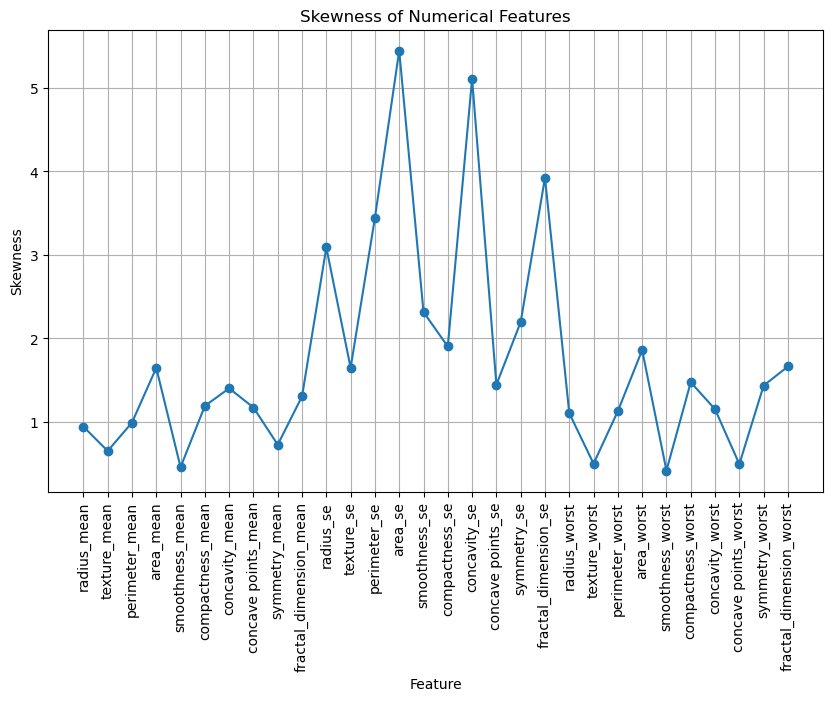

In [32]:
import matplotlib.pyplot as plt

# Calculate skewness for each numerical feature
skewness = df.drop('diagnosis', axis=1).apply(lambda x: x.skew())

# Plot skewness values
plt.figure(figsize=(10, 6))
plt.plot(skewness.index, skewness.values, marker='o', linestyle='-')
plt.xlabel('Feature')
plt.ylabel('Skewness')
plt.title('Skewness of Numerical Features')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


In [22]:
from scipy.stats import ttest_ind

# Separate the data into Malignant and Benign classes
data_malignant = df[df['diagnosis'] == 'M']
data_benign = df[df['diagnosis'] == 'B']

# Perform t-test for each feature
p_values = {}
for feature in df.columns[1:]:  # Exclude the 'diagnosis' column
    t_statistic, p_value = ttest_ind(data_malignant[feature], data_benign[feature])
    p_values[feature] = p_value

# Print the p-values
print("Feature p-values:")
for feature, p_value in p_values.items():
    print(f"{feature}: {p_value}")


Feature p-values:
radius_mean: 8.465940572262422e-96
texture_mean: 4.0586360478980736e-25
perimeter_mean: 8.43625103617473e-101
area_mean: 4.734564310307344e-88
smoothness_mean: 1.0518503592032013e-18
compactness_mean: 3.9382631058873895e-56
concavity_mean: 9.966555755072963e-84
concave points_mean: 7.101150161057422e-116
symmetry_mean: 5.733384028466827e-16
fractal_dimension_mean: 0.7599368037256238
radius_se: 9.73894865646109e-50
texture_se: 0.8433320287670163
perimeter_se: 1.6519051758498057e-47
area_se: 5.8955213926058635e-46
smoothness_se: 0.11029660865789295
compactness_se: 9.975994654074766e-13
concavity_se: 8.260176167970112e-10
concave points_se: 3.0723087688180654e-24
symmetry_se: 0.8766418183858812
fractal_dimension_se: 0.06307355082239346
radius_worst: 8.482291921684414e-116
texture_worst: 1.0780574879494241e-30
perimeter_worst: 5.771397139668621e-119
area_worst: 2.828847704286693e-97
smoothness_worst: 6.575143633984769e-26
compactness_worst: 7.069816352538377e-55
concavity

After obtaining the p-values, you can interpret them to identify features that have statistically significant differences in distribution between the two classes. Lower p-values indicate stronger evidence against the null hypothesis (i.e., that the distributions of the feature are the same for both classes). These features may be more relevant for predicting the diagnosis.

                                       PCA(PRINCIPAL COMPONENT ANALYSIS)

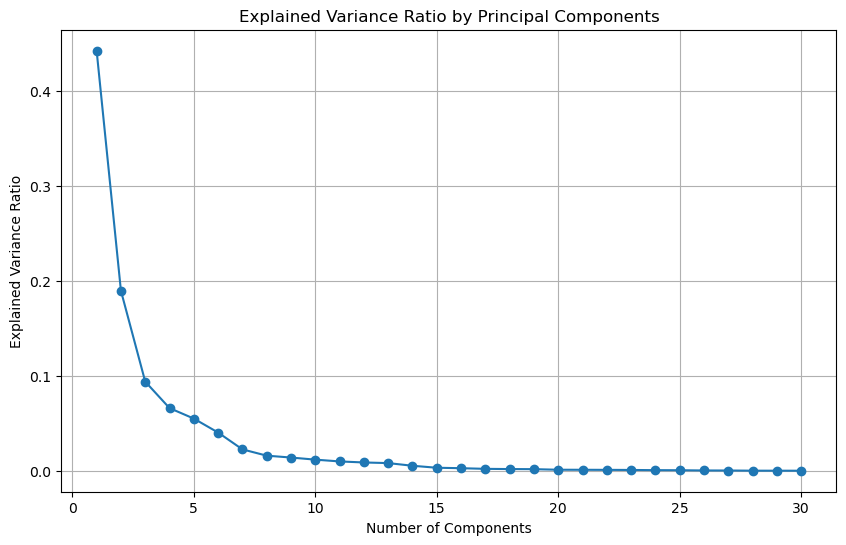

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Standardize the data
X = df.drop('diagnosis', axis=1)  # Assuming 'diagnosis' is the target variable
X_standardized = (X - X.mean()) / X.std()

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')
plt.grid(True)
plt.show()


BELOW ARE THE TO 5 FEATURES WHICH ARE SELECTED USING PCA:
'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'

In [29]:
# Extract the feature names
feature_names = df.columns[1:]

# Sort the explained variance ratios in descending order
explained_variance_ratios_sorted = sorted(zip(feature_names, pca.explained_variance_ratio_), key=lambda x: x[1], reverse=True)

# Extract the top N features with the highest explained variance ratios
top_n_pca_features = [feature for feature, _ in explained_variance_ratios_sorted[:5]]
print(f"Top {5} features with the highest explained variance ratios from PCA:")
print(top_n_pca_features)


Top 5 features with the highest explained variance ratios from PCA:
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']


 The plot of explained variance ratio by principal components obtained from PCA provides valuable insights into the structure and dimensionality of the data. Here's what we can infer from the graph:

1)Explained Variance Ratio:

The y-axis represents the proportion of variance explained by each principal component.
The x-axis represents the number of principal components.
2)Elbow Point:

Typically, a significant drop or an "elbow" in the explained variance ratio plot suggests the optimal number of principal components to retain.

3)Interpretation:

High explained variance ratios for the first few principal components indicate that they capture most of the variability in the dataset.

4)Dimensionality Reduction:

PCA allows us to reduce the dimensionality of the dataset by selecting a subset of principal components that capture most of the variability.
Reducing the dimensionality can simplify the analysis, visualization, and modeling of the data while retaining important patterns and structures.

                                                  ANOVA TEST

In [25]:
from scipy.stats import f_oneway

# Separate the data into Malignant and Benign classes
data_malignant = df[df['diagnosis'] == 'M']
data_benign = df[df['diagnosis'] == 'B']

# Perform ANOVA for each feature
anova_results = {}
for feature in df.columns[1:]:  # Exclude the 'diagnosis' column
    f_statistic, p_value = f_oneway(data_malignant[feature], data_benign[feature])
    anova_results[feature] = p_value

# Print the p-values
print("ANOVA p-values:")
for feature, p_value in anova_results.items():
    print(f"{feature}: {p_value}")


ANOVA p-values:
radius_mean: 8.46594057226382e-96
texture_mean: 4.0586360478986136e-25
perimeter_mean: 8.43625103617395e-101
area_mean: 4.7345643103077244e-88
smoothness_mean: 1.051850359203376e-18
compactness_mean: 3.938263105887389e-56
concavity_mean: 9.966555755074321e-84
concave points_mean: 7.101150161059154e-116
symmetry_mean: 5.73338402846732e-16
fractal_dimension_mean: 0.7599368037255626
radius_se: 9.738948656462521e-50
texture_se: 0.8433320287670788
perimeter_se: 1.6519051758498877e-47
area_se: 5.895521392606798e-46
smoothness_se: 0.11029660865790443
compactness_se: 9.975994654075776e-13
concavity_se: 8.260176167970819e-10
concave points_se: 3.072308768818453e-24
symmetry_se: 0.8766418183860331
fractal_dimension_se: 0.06307355082240175
radius_worst: 8.482291921685478e-116
texture_worst: 1.0780574879494634e-30
perimeter_worst: 5.771397139669512e-119
area_worst: 2.8288477042872213e-97
smoothness_worst: 6.575143633985019e-26
compactness_worst: 7.069816352539104e-55
concavity_wors

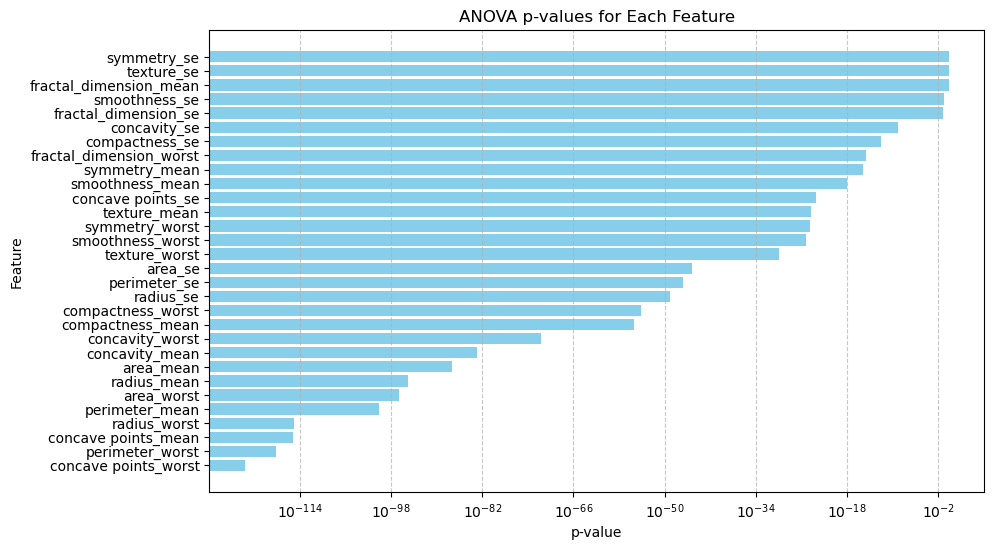

In [26]:
import matplotlib.pyplot as plt

# Convert p-values to a DataFrame for easier plotting
p_values_df = pd.DataFrame.from_dict(anova_results, orient='index', columns=['p-value'])
p_values_df.sort_values(by='p-value', ascending=True, inplace=True)  # Sort by p-value

# Plot the p-values
plt.figure(figsize=(10, 6))
plt.barh(y=p_values_df.index, width=p_values_df['p-value'], color='skyblue')
plt.xlabel('p-value')
plt.ylabel('Feature')
plt.title('ANOVA p-values for Each Feature')
plt.xscale('log')  # Use logarithmic scale for better visualization
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


ANOVA on the Wisconsin Breast Cancer dataset helps us identify features with statistically significant differences in mean values between Malignant and Benign tumors. Features with low p-values (< 0.05) are considered important for tumor classification and may provide insights into tumor biology and potential biomarkers. This analysis guides feature selection for building classification models and aids in understanding the underlying mechanisms of tumor development and progression

BELOW SHOWS IMPORTANT FEATURES WHERE THE P VALUE<0.05

In [30]:
# Filter features with significant p-values (< 0.05)
significant_features_anova = p_values_df[p_values_df['p-value'] < 0.05].index
print("Features with significant p-values from ANOVA:")
print(significant_features_anova)


Features with significant p-values from ANOVA:
Index(['concave points_worst', 'perimeter_worst', 'concave points_mean',
       'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean',
       'area_mean', 'concavity_mean', 'concavity_worst', 'compactness_mean',
       'compactness_worst', 'radius_se', 'perimeter_se', 'area_se',
       'texture_worst', 'smoothness_worst', 'symmetry_worst', 'texture_mean',
       'concave points_se', 'smoothness_mean', 'symmetry_mean',
       'fractal_dimension_worst', 'compactness_se', 'concavity_se'],
      dtype='object')
